## Predicting Fraudulent Customer Using Machine Learning

This notebook will reveal __machine learning__ and __data science__ findings by exploring the problem of fraud detection ___classification___.

### What is classification?
__Classification__ involves deciding whether a sample is part of one class or another (__single-class classification__). _In our case, we'll predict wheter a customer is fraud or not_. If there are multiple class options, it's referred to as __multi-class classification__.

### What We'll End Up With
Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

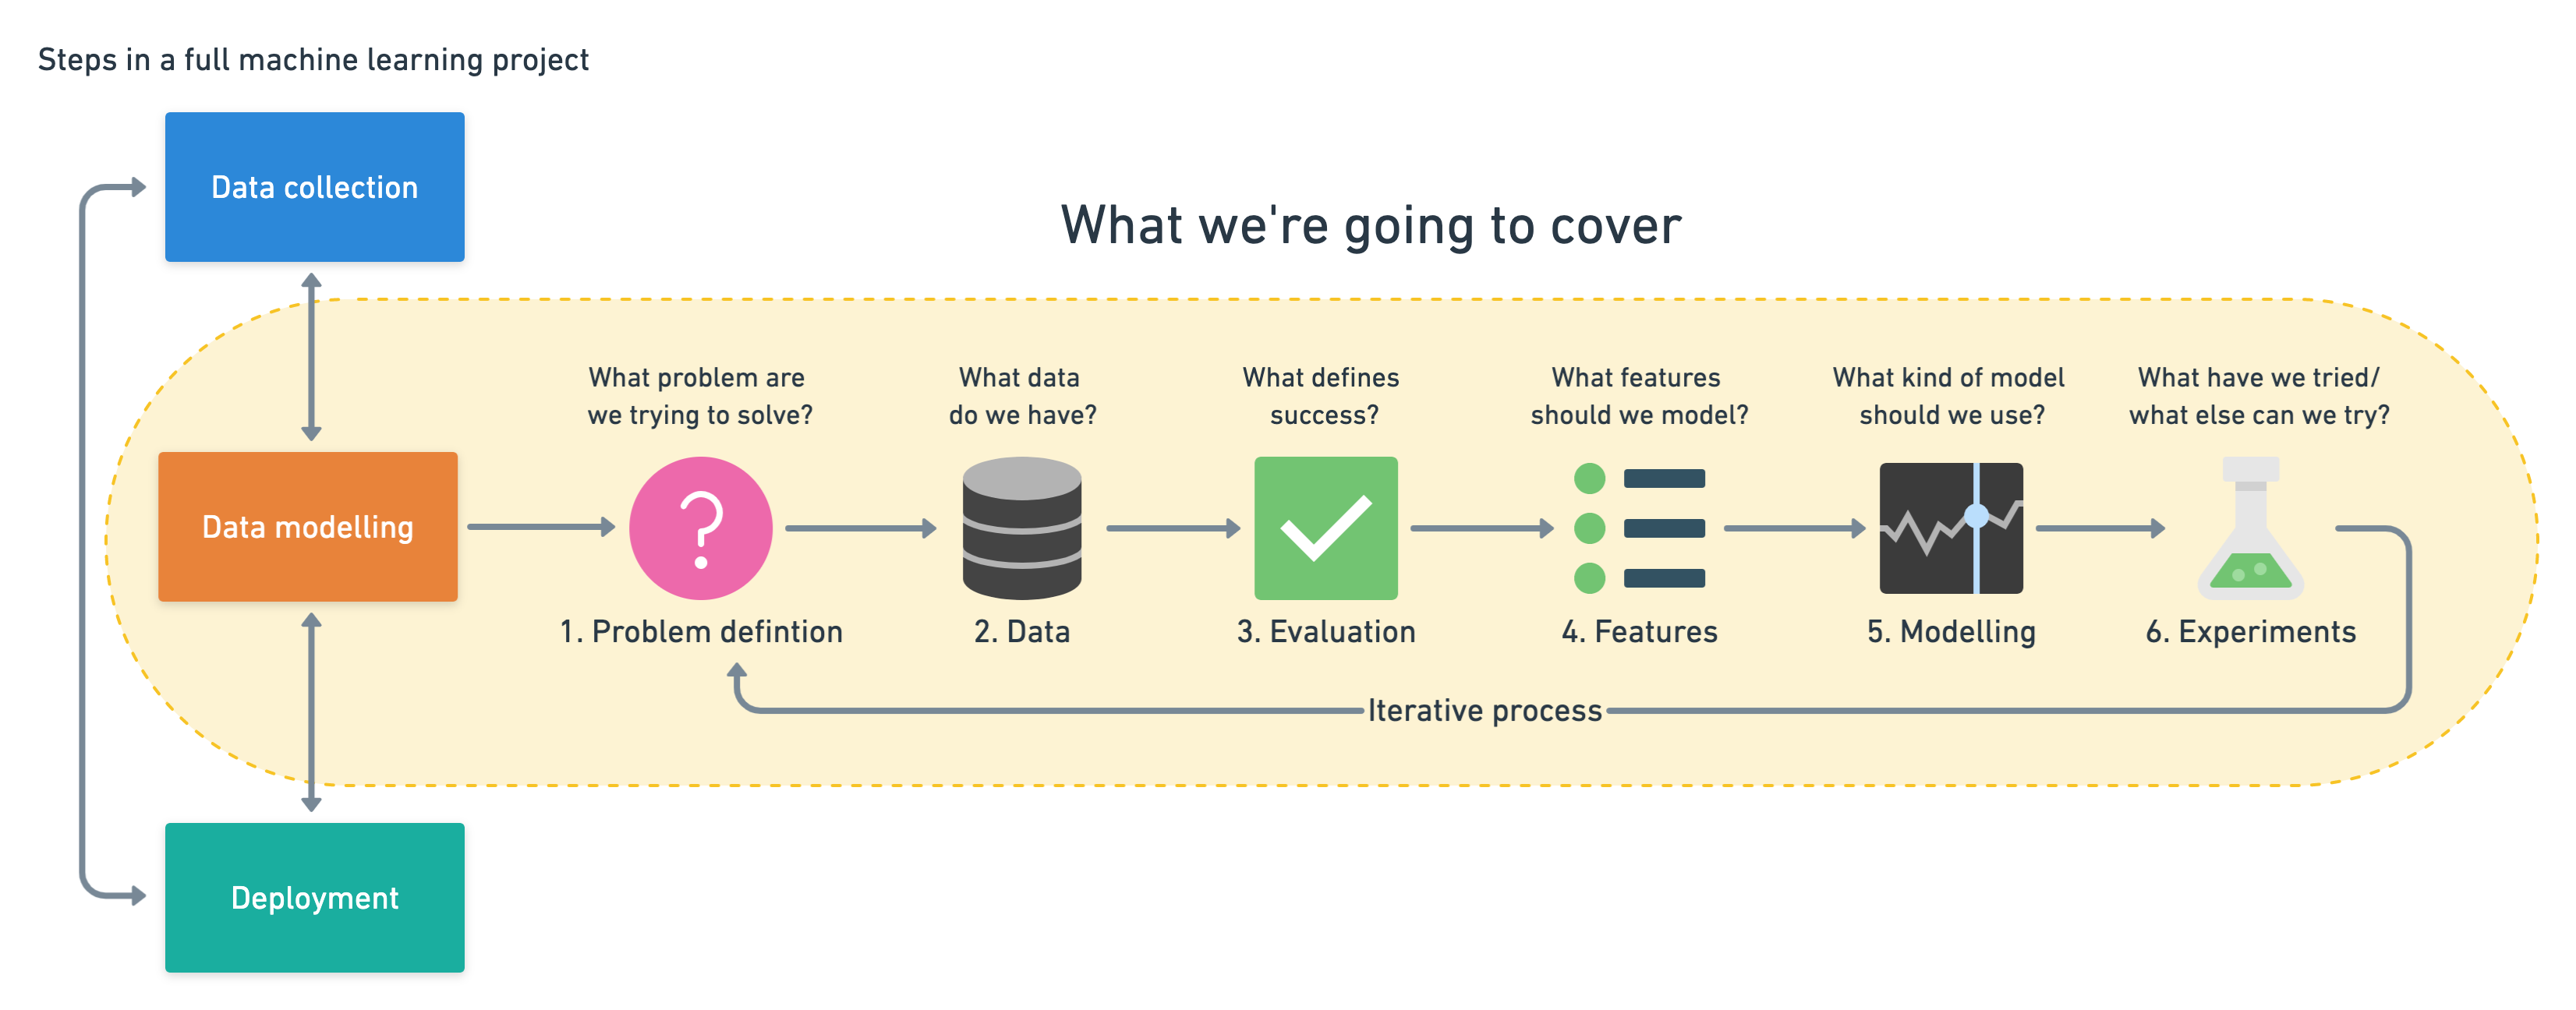

More specifically, we'll look at the following steps.<br>

* __Exploratory data analysis (EDA)__ - the process of going through a dataset and finding out more about it.<br>
* __Model training - create model(s)__ to learn to predict a target variable based on other variables.<br>
* __Model evaluation__ - evaluating a models predictions using problem-specific evaluation metrics.<br>
* __Model comparison__ - comparing several different models to find the best one.<br>
* __Model fine-tuning__ - once we've found a good model, how can we improve it?<br>
* __Feature importance__ - since we're predicting the presence of heart disease, are there some things which are more important for prediction?<br>
* __Cross-validation__ - if we do build a good model, can we be sure it will work on unseen data?<br>
* __Reporting what we've found__ - if we had to present our work, what would we show someone?<br>

### 1. Problem Definition
In our case, the problem we will be exploring is __binary classification__ (a sample can only be one of two things, __True__ or __Falsse__).<br>

This is because we're going to be using a number of differnet features (pieces of information) about a customer is fraud or not <br>

In a statement,<br>

<blockquote>Given clinical parameters about a patient, can we predict whether or not they have heart disease?</blockquote>

### 2. Data
The original database contains 2 main data, _`transaction_data.csv`_ and _`customer_data.csv`_. Attributes (also called features) are the variables what we'll use to predict our target variable.<br>

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.<br>

<blockquote>We use the independent variables to predict our dependent variable.</blockquote>

Or in our case, the __independent variables__ are a customer's different transaction and data attributes and the __dependent variable__ is whether or not they are fraudulent.

### 3. Evaluation
The evaluation metric is something we might define at the start of a project.<br>

Since machine learning is very experimental, we might say something like,<br>

<blockquote>If we can reach 90% accuracy at predicting whether or not a customer is fraudulent during the proof of concept, we'll pursure this project.</blockquote>

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.<br>

However, due to the nature of experimentation, the evaluation metric may change over time.<br>

### 4. Preparing The Tools
- __<a href="https://pandas.pydata.org/">pandas</a>__ for data analysis.<br>
- __<a href="https://numpy.org/">NumPy</a>__ for numerical operations.<br>
- __<a href="https://matplotlib.org/">Matplotlib</a>/<a href="https://seaborn.pydata.org/">Seaborn</a>__ for plotting or data visualization.<br>
- __<a href="https://scikit-learn.org/stable/">Scikit-Learn</a>__ for machine learning modelling and evaluation.

In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load Data

In [2]:
trans_df = pd.read_csv("transaction_data.csv")
customer_df = pd.read_csv("customer_data.csv")

#### Cleaning and Manipulating Transaction Data
The purpose of this step is to generate newly clean transaction dataframe planned to be merged with customer data

In [3]:
# displaying the data
trans_df.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [4]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


__Modifying Numerical Columns:__ `paymentMethodRegistrationFailure`, `transactionFailed`, `transactionAmount` 

In [5]:
# create sliced dataframe (perhaps they're going to be significant features on our model)
# groupby numerical columns using customerEmail with sum method
trans_df_numeric = trans_df.groupby("customerEmail")[["paymentMethodRegistrationFailure", "transactionFailed", "transactionAmount"]].sum()

In [6]:
trans_df_numeric

,paymentMethodRegistrationFailure,transactionFailed,transactionAmount
customerEmail,,,
1yf0@jedyz63t,0,5,217
9es7t@u6n7x,0,1,32
abigail08@yahoo.com,1,2,209
alec27@bell.com,0,2,158
aliciaanthony@martin.com,0,0,95
...,...,...,...
wdelacruz@yahoo.com,0,1,231
whitedavid@jones-lloyd.org,3,0,283
ybrown@gmail.com,0,1,144


__Modifying Categorical Column:__ `paymentMethodType`

In [7]:
# create pivot table from paymentMethodType with count method
trans_df_paymentType = trans_df.pivot_table(index="customerEmail", values=["orderId"],columns=["paymentMethodType"],aggfunc="count", fill_value=0)

In [8]:
# drop column level
trans_df_paymentType.columns = trans_df_paymentType.columns.droplevel()

# remove spaces in column's name
trans_df_paymentType.columns = trans_df_paymentType.columns.str.replace(' ','_')

In [9]:
trans_df_paymentType

paymentMethodType,apple_pay,bitcoin,card,paypal
customerEmail,,,,
1yf0@jedyz63t,0,0,7,3
9es7t@u6n7x,0,0,2,0
abigail08@yahoo.com,0,0,5,0
alec27@bell.com,0,0,6,0
aliciaanthony@martin.com,0,0,3,0
...,...,...,...,...
wdelacruz@yahoo.com,0,0,4,0
whitedavid@jones-lloyd.org,0,0,5,0
ybrown@gmail.com,0,0,5,0


__Modifying Categorical Column:__ `paymentMethodProvider`

In [10]:
# create pivot table from paymentProvider with count method
trans_df_paymentProvider = trans_df.pivot_table(index="customerEmail", values=["orderId"],columns=["paymentMethodProvider"],aggfunc="count", fill_value=0)

In [11]:
# drop column level
trans_df_paymentProvider.columns = trans_df_paymentProvider.columns.droplevel()

# remove spaces in column's name
trans_df_paymentProvider.columns = trans_df_paymentProvider.columns.str.replace(' ','_')


In [12]:
trans_df_paymentProvider

paymentMethodProvider,American_Express,Diners_Club_/_Carte_Blanche,Discover,JCB_15_digit,JCB_16_digit,Maestro,Mastercard,VISA_13_digit,VISA_16_digit,Voyager
customerEmail,,,,,,,,,,
1yf0@jedyz63t,0,0,0,0,0,1,3,6,0,0
9es7t@u6n7x,0,0,0,0,0,0,0,0,0,2
abigail08@yahoo.com,0,0,0,0,0,1,0,0,4,0
alec27@bell.com,0,0,0,0,0,0,0,0,2,4
aliciaanthony@martin.com,0,0,0,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
wdelacruz@yahoo.com,0,0,0,0,4,0,0,0,0,0
whitedavid@jones-lloyd.org,0,0,0,0,5,0,0,0,0,0
ybrown@gmail.com,0,0,0,0,3,0,0,0,1,1


__Modifying Categorical Column:__ `orderState`

In [13]:
# create pivot table from orderState with count method
trans_df_orderState = trans_df.pivot_table(index="customerEmail", values=["orderId"],columns=["orderState"],aggfunc="count", fill_value=0)

In [14]:
# drop column level
trans_df_orderState.columns = trans_df_orderState.columns.droplevel()

In [15]:
trans_df_orderState

orderState,failed,fulfilled,pending
customerEmail,,,
1yf0@jedyz63t,0,10,0
9es7t@u6n7x,0,2,0
abigail08@yahoo.com,2,1,2
alec27@bell.com,0,5,1
aliciaanthony@martin.com,0,3,0
...,...,...,...
wdelacruz@yahoo.com,2,2,0
whitedavid@jones-lloyd.org,1,4,0
ybrown@gmail.com,1,4,0


__Concatenating All Modified Dataframes into Single Clean Transaction Dataframe__<br>
`trans_df_numeric` + `trans_df_paymentType` + `trans_df_paymentProvider` + `trans_df_orderState`

In [16]:
clean_df_transaction = pd.concat([trans_df_numeric, trans_df_paymentType, trans_df_paymentProvider,  trans_df_orderState], axis=1)

__A Clean Transaction Dataframe__

In [17]:
clean_df_transaction.head()

,paymentMethodRegistrationFailure,transactionFailed,transactionAmount,apple_pay,bitcoin,card,paypal,American_Express,Diners_Club_/_Carte_Blanche,Discover,JCB_15_digit,JCB_16_digit,Maestro,Mastercard,VISA_13_digit,VISA_16_digit,Voyager,failed,fulfilled,pending
customerEmail,,,,,,,,,,,,,,,,,,,,
1yf0@jedyz63t,0,5,217,0,0,7,3,0,0,0,0,0,1,3,6,0,0,0,10,0
9es7t@u6n7x,0,1,32,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,2,0
abigail08@yahoo.com,1,2,209,0,0,5,0,0,0,0,0,0,1,0,0,4,0,2,1,2
alec27@bell.com,0,2,158,0,0,6,0,0,0,0,0,0,0,0,0,2,4,0,5,1
aliciaanthony@martin.com,0,0,95,0,0,3,0,0,0,0,0,0,3,0,0,0,0,0,3,0


In [18]:
clean_df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 1yf0@jedyz63t to zgraham@yahoo.com
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   paymentMethodRegistrationFailure  136 non-null    int64
 1   transactionFailed                 136 non-null    int64
 2   transactionAmount                 136 non-null    int64
 3   apple_pay                         136 non-null    int64
 4   bitcoin                           136 non-null    int64
 5   card                              136 non-null    int64
 6   paypal                            136 non-null    int64
 7   American_Express                  136 non-null    int64
 8   Diners_Club_/_Carte_Blanche       136 non-null    int64
 9   Discover                          136 non-null    int64
 10  JCB_15_digit                      136 non-null    int64
 11  JCB_16_digit                      136 non-null    int64
 12  Maestro        

#### Cleaning and Manipulating Customer Data
The purpose of this step is to generate newly customer transaction dataframe planned to be merged with transaction data

In [19]:
# displaying the data
customer_df.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [20]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


__Deleting Unneccesary Columns__: `Unnamed: 0`+ `customerBillingAddress`<br>
Why we do this? Because machine learning can only process numerical data, removing as many as non-numerical features is reasonable approach

In [21]:
# drop columns
customer_df.drop(['Unnamed: 0', 'customerBillingAddress'], axis=1, inplace=True)

__Turning Categorical Columns into Numerical__: `customerPhone`+ `customerPhone` + `customerIPAddress`<br>
* use built-in __len()__
* rename column with prefix: digit

In [22]:
#turn categorical into numerical
customer_df["customerIPAddress"] = customer_df["customerIPAddress"].str.len()
customer_df["customerPhone"] = customer_df["customerPhone"].str.len()
customer_df["customerDevice"] = customer_df["customerDevice"].str.len()

In [23]:
# renaming columns' name
customer_df.rename(columns=({
    "customerIPAddress": "digit_customerIPAddress",
    "customerPhone": "digit_customerPhone",
    "customerDevice": "digit_customerDevice"
}), inplace=True)

__Turning Categorical Columns into Numerical__: `Fraud`<br>
* use built-in __astype()__
* rename column with: __Target__

In [24]:
# turning fraud column to where integer 1=True and 0=False
customer_df["Fraud"] = customer_df["Fraud"].astype("int")

In [25]:
# renaming column' name
customer_df.rename(columns=({
    "Fraud": "Target"
}), inplace=True)

__A Clean Customer Dataframe__

In [26]:
customer_df.head()

,customerEmail,digit_customerPhone,digit_customerDevice,digit_customerIPAddress,No_Transactions,No_Orders,No_Payments,Target
0,josephhoward@yahoo.com,12,20,12,2,2,1,0
1,evansjeffery@yahoo.com,14,20,15,3,3,7,1
2,andersonwilliam@yahoo.com,12,20,39,5,3,2,0
3,rubenjuarez@yahoo.com,18,20,39,3,3,1,0
4,uchen@malone.com,14,20,14,7,7,6,1


In [27]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   customerEmail            168 non-null    object
 1   digit_customerPhone      168 non-null    int64 
 2   digit_customerDevice     168 non-null    int64 
 3   digit_customerIPAddress  168 non-null    int64 
 4   No_Transactions          168 non-null    int64 
 5   No_Orders                168 non-null    int64 
 6   No_Payments              168 non-null    int64 
 7   Target                   168 non-null    int32 
dtypes: int32(1), int64(6), object(1)
memory usage: 10.0+ KB


### Merge Data
After all dataframes were cleaned, it's time to merge them together as final dataframe before we create our predicting models<br>
* `clean_df_transaction` with 136 rows + `customer_df` with 168 rows<br><br>
* merged on `customerEmail`

In [28]:
df = pd.merge(customer_df, clean_df_transaction, how="left", left_on="customerEmail", right_index=True)

In [29]:
# display data
df.head()

,customerEmail,digit_customerPhone,digit_customerDevice,digit_customerIPAddress,No_Transactions,No_Orders,No_Payments,Target,paymentMethodRegistrationFailure,transactionFailed,...,JCB_15_digit,JCB_16_digit,Maestro,Mastercard,VISA_13_digit,VISA_16_digit,Voyager,failed,fulfilled,pending
0,josephhoward@yahoo.com,12,20,12,2,2,1,0,2.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,evansjeffery@yahoo.com,14,20,15,3,3,7,1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
2,andersonwilliam@yahoo.com,12,20,39,5,3,2,0,0.0,2.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0
3,rubenjuarez@yahoo.com,18,20,39,3,3,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0
4,uchen@malone.com,14,20,14,7,7,6,1,0.0,2.0,...,0.0,3.0,0.0,0.0,1.0,2.0,0.0,1.0,6.0,0.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customerEmail                     168 non-null    object 
 1   digit_customerPhone               168 non-null    int64  
 2   digit_customerDevice              168 non-null    int64  
 3   digit_customerIPAddress           168 non-null    int64  
 4   No_Transactions                   168 non-null    int64  
 5   No_Orders                         168 non-null    int64  
 6   No_Payments                       168 non-null    int64  
 7   Target                            168 non-null    int32  
 8   paymentMethodRegistrationFailure  143 non-null    float64
 9   transactionFailed                 143 non-null    float64
 10  transactionAmount                 143 non-null    float64
 11  apple_pay                         143 non-null    float64
 12  bitcoin 

In [31]:
# find out missing values
df.isnull().sum()

customerEmail                        0
digit_customerPhone                  0
digit_customerDevice                 0
digit_customerIPAddress              0
No_Transactions                      0
No_Orders                            0
No_Payments                          0
Target                               0
paymentMethodRegistrationFailure    25
transactionFailed                   25
transactionAmount                   25
apple_pay                           25
bitcoin                             25
card                                25
paypal                              25
American_Express                    25
Diners_Club_/_Carte_Blanche         25
Discover                            25
JCB_15_digit                        25
JCB_16_digit                        25
Maestro                             25
Mastercard                          25
VISA_13_digit                       25
VISA_16_digit                       25
Voyager                             25
failed                   

In [32]:
# fill missing values with 0 (because all missing values are numerical (float))
df.fillna(0, inplace=True)

In [33]:
# move target into last column position (to simplify feature selection process)
df.insert(len(df.columns)-1, 'Target', df.pop('Target'))

In [34]:
# removing customerEmail (we just need it to merge, afterall we no longer need it)
df.drop("customerEmail", axis=1, inplace=True)

### Exploratory Data Analysis
Once we've done with a dataset, the next step is to explore the data to find insights

In [35]:
# Let's check the top 5 rows of our dataframe
df.head()

,digit_customerPhone,digit_customerDevice,digit_customerIPAddress,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionFailed,transactionAmount,apple_pay,...,JCB_16_digit,Maestro,Mastercard,VISA_13_digit,VISA_16_digit,Voyager,failed,fulfilled,pending,Target
0,12,20,12,2,2,1,2.0,0.0,44.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
1,14,20,15,3,3,7,1.0,1.0,111.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1
2,12,20,39,5,3,2,0.0,2.0,131.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0
3,18,20,39,3,3,1,0.0,0.0,85.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0
4,14,20,14,7,7,6,0.0,2.0,411.0,3.0,...,3.0,0.0,0.0,1.0,2.0,0.0,1.0,6.0,0.0,1


In [36]:
# Let's check the last 5 rows of our dataframe
df.tail()

,digit_customerPhone,digit_customerDevice,digit_customerIPAddress,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionFailed,transactionAmount,apple_pay,...,JCB_16_digit,Maestro,Mastercard,VISA_13_digit,VISA_16_digit,Voyager,failed,fulfilled,pending,Target
163,17,20,14,3,3,1,0.0,0.0,126.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1
164,19,20,10,6,5,3,0.0,1.0,149.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,0.0,1
165,16,20,38,4,4,2,0.0,6.0,1033.0,0.0,...,7.0,5.0,0.0,0.0,10.0,3.0,3.0,25.0,0.0,1
166,12,20,15,8,6,6,0.0,2.0,378.0,0.0,...,2.0,1.0,0.0,0.0,0.0,3.0,1.0,7.0,0.0,1
167,18,20,13,7,5,4,0.0,2.0,176.0,0.0,...,1.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,0.0,0


`value_counts()` allows us to show how many times each of the values of a categorical column appear.

In [37]:
# Let's see how many fraud (1) and not fraud (0) samples we have in our dataframe
df.Target.value_counts()

0    107
1     61
Name: Target, dtype: int64

Since these two values are not close to even, our target column can be considered __imbalanced__ (where non-fraud dominates). An unbalanced target column, meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, all of our target classes have the same number of samples.

If we'd prefer these values in percentages, `value_counts()` takes a parameter, normalize which can be set to __true__.

In [38]:
# normalize value_counts
df.Target.value_counts(normalize=True)

0    0.636905
1    0.363095
Name: Target, dtype: float64

We can plot the target column value counts by calling the `plot()` function and telling it what kind of plot we'd like, in this case, bar is good.

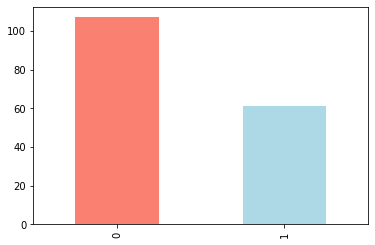

In [39]:
# Plot the value counts with a bar graph
df.Target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.show()

`df.info()` shows a quick insight to the number of missing values you have and what type of data your working with.<br>

In our case, there are no missing values and all of our columns are numerical in nature.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   digit_customerPhone               168 non-null    int64  
 1   digit_customerDevice              168 non-null    int64  
 2   digit_customerIPAddress           168 non-null    int64  
 3   No_Transactions                   168 non-null    int64  
 4   No_Orders                         168 non-null    int64  
 5   No_Payments                       168 non-null    int64  
 6   paymentMethodRegistrationFailure  168 non-null    float64
 7   transactionFailed                 168 non-null    float64
 8   transactionAmount                 168 non-null    float64
 9   apple_pay                         168 non-null    float64
 10  bitcoin                           168 non-null    float64
 11  card                              168 non-null    float64
 12  paypal  

Another way to get some quick insights on your dataframe is to use `df.describe()`. `describe()` shows a range of different metrics about your numerical columns such as _mean_, _max_, _mean_, _median_ and _standard deviation_.

In [41]:
df.describe()

,digit_customerPhone,digit_customerDevice,digit_customerIPAddress,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionFailed,transactionAmount,apple_pay,...,JCB_16_digit,Maestro,Mastercard,VISA_13_digit,VISA_16_digit,Voyager,failed,fulfilled,pending,Target
count,168.000000,168.0,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,15.190476,20.0,24.773810,3.708333,2.845238,2.035714,0.488095,1.250000,171.345238,0.291667,...,0.994048,0.619048,0.190476,0.345238,0.988095,0.488095,0.500000,4.113095,0.261905,0.363095
std,2.849419,0.0,12.703294,2.801527,1.981919,2.113240,1.532045,1.794035,228.083082,0.993115,...,2.057546,1.503726,0.788787,1.335773,2.347092,1.178592,0.902425,5.253371,0.805952,0.482330
min,11.000000,20.0,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,20.0,13.000000,1.000000,1.000000,1.000000,0.000000,0.000000,38.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,16.000000,20.0,14.000000,4.000000,3.000000,1.000000,0.000000,1.000000,114.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,18.000000,20.0,39.000000,5.000000,4.000000,2.000000,0.000000,2.000000,192.000000,0.000000,...,0.250000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,0.000000,1.000000
max,20.000000,20.0,39.000000,15.000000,8.000000,15.000000,13.000000,12.000000,1033.000000,7.000000,...,10.000000,6.000000,6.000000,13.000000,10.000000,6.000000,3.000000,25.000000,7.000000,1.000000


#### The distribution of transaction amount data using __histogram__

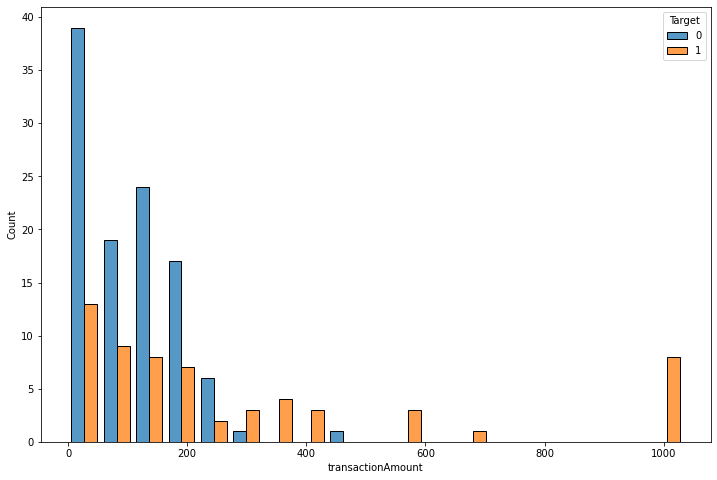

In [42]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="transactionAmount", hue="Target", multiple="dodge", shrink=.8)
plt.show()

#### The distribution of number of transaction data using __box plot__

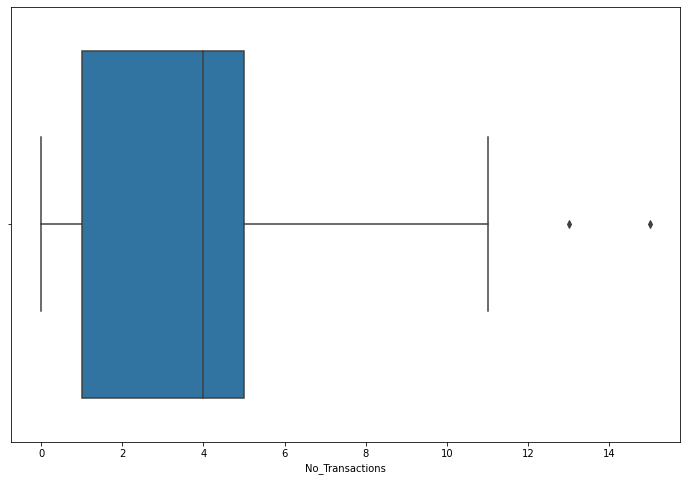

In [43]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='No_Transactions', hue='Target')
plt.show()

#### Correlation Matrix
Correlation between independent variables<br>
Finally, we'll compare all of the independent variables in one hit.<br>

Why?<br>

Because this may give an idea of which independent variables may or may not have an impact on our target variable.<br>

We can do this using `df.corr()` which will create a correlation matrix for us, in other words, a big table of numbers telling us how related each variable is the other.<br>

In [44]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,digit_customerPhone,digit_customerDevice,digit_customerIPAddress,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionFailed,transactionAmount,apple_pay,...,JCB_16_digit,Maestro,Mastercard,VISA_13_digit,VISA_16_digit,Voyager,failed,fulfilled,pending,Target
digit_customerPhone,1.000000,NaN,-0.114603,0.028005,-0.005352,0.003836,0.162382,0.042170,0.011249,-0.093812,...,-0.084578,-0.080790,0.135621,0.032963,-0.069497,0.043472,-0.072190,0.011353,0.118950,-0.081122
digit_customerDevice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
digit_customerIPAddress,-0.114603,NaN,1.000000,-0.114765,-0.114372,-0.051670,-0.006908,-0.013006,0.020467,-0.016098,...,-0.009445,0.130255,-0.121170,0.070266,0.073615,0.023016,0.014626,0.023087,-0.045063,-0.065676
No_Transactions,0.028005,NaN,-0.114765,1.000000,0.888020,0.225298,0.305419,0.611486,0.433418,0.164197,...,0.182529,0.138351,0.139101,0.343895,0.062305,0.148559,0.228562,0.394066,0.405320,0.136451
No_Orders,-0.005352,NaN,-0.114372,0.888020,1.000000,0.323013,0.289286,0.339345,0.439032,0.211691,...,0.222971,0.170976,0.118558,0.275893,0.127041,0.168398,0.287929,0.377821,0.171729,0.234528
No_Payments,0.003836,NaN,-0.051670,0.225298,0.323013,1.000000,-0.003567,-0.005528,0.055954,0.106282,...,-0.001328,-0.018305,0.042595,0.091064,-0.053034,0.017001,-0.056519,0.059505,-0.037167,0.357312
paymentMethodRegistrationFailure,0.162382,NaN,-0.006908,0.305419,0.289286,-0.003567,1.000000,0.153593,0.112752,-0.003608,...,-0.056061,-0.043568,-0.047663,0.543337,-0.015027,-0.066404,0.077960,0.068244,0.065585,0.058557
transactionFailed,0.042170,NaN,-0.013006,0.611486,0.339345,-0.005528,0.153593,1.000000,0.761891,0.002521,...,0.457864,0.439490,0.046546,0.246125,0.498437,0.344085,0.443836,0.779100,0.405854,0.178191
transactionAmount,0.011249,NaN,0.020467,0.433418,0.439032,0.055954,0.112752,0.761891,1.000000,0.041823,...,0.679982,0.603248,0.013745,0.128165,0.771917,0.448198,0.651378,0.943689,0.127426,0.419225
apple_pay,-0.093812,NaN,-0.016098,0.164197,0.211691,0.106282,-0.003608,0.002521,0.041823,1.000000,...,-0.075337,0.074848,-0.010192,0.036487,-0.060156,-0.081428,0.043430,0.000526,0.091022,0.052608


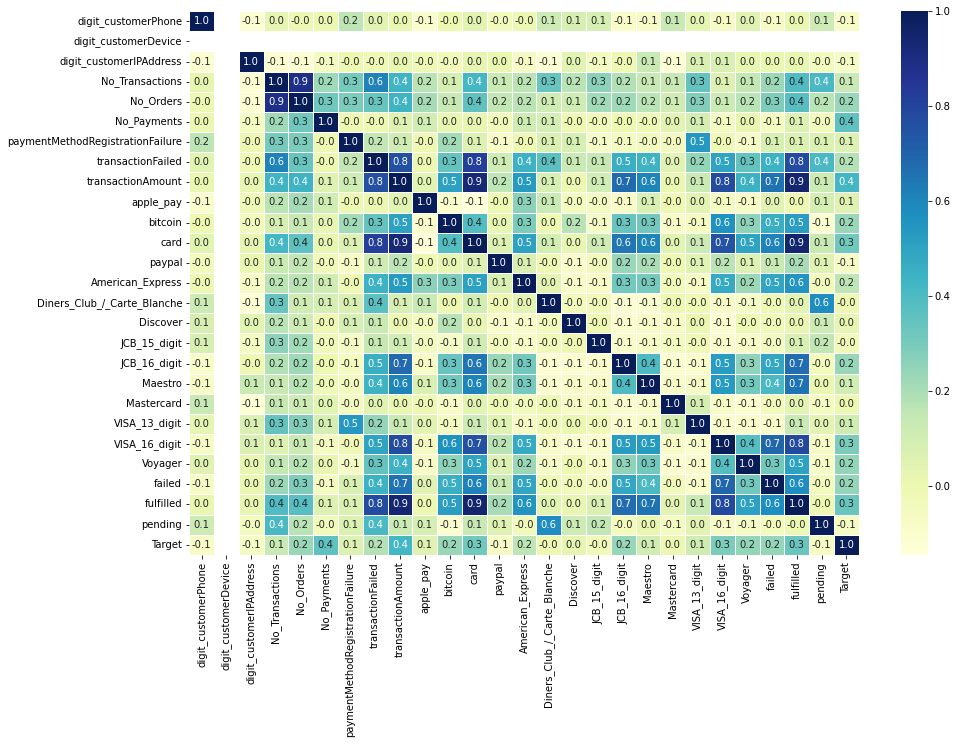

In [45]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".1f", 
            cmap="YlGnBu")
plt.show()

### 5. Modeling
We've explored the data, now we'll try to use machine learning to predict our target variable based on the 26 independent variables.<br>

Remember our problem?

<blockquote>Given parameters about a customer, can we predict whether or not they are fraudulent?</blockquote><br>

That's what we'll be trying to answer.<br>

And remember our evaluation metric?

<blockquote>If we can reach 90% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.</blockquote><br>

That's what we'll be aiming for.<br>

But before we build a model, we have to get our dataset ready.<br>

Let's look at it again.<br>

In [46]:
df.head()

,digit_customerPhone,digit_customerDevice,digit_customerIPAddress,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionFailed,transactionAmount,apple_pay,...,JCB_16_digit,Maestro,Mastercard,VISA_13_digit,VISA_16_digit,Voyager,failed,fulfilled,pending,Target
0,12,20,12,2,2,1,2.0,0.0,44.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
1,14,20,15,3,3,7,1.0,1.0,111.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1
2,12,20,39,5,3,2,0.0,2.0,131.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0
3,18,20,39,3,3,1,0.0,0.0,85.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0
4,14,20,14,7,7,6,0.0,2.0,411.0,3.0,...,3.0,0.0,0.0,1.0,2.0,0.0,1.0,6.0,0.0,1


We're trying to predict our target variable using all of the other variables.

To do this, we'll __split__ the target variable from the rest.

In [47]:
# Everything except target variable
X = df.drop("Target", axis=1)

# Target variable
y = df["Target"].values

Now let's see our variables

In [48]:
X.head()

,digit_customerPhone,digit_customerDevice,digit_customerIPAddress,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionFailed,transactionAmount,apple_pay,...,JCB_15_digit,JCB_16_digit,Maestro,Mastercard,VISA_13_digit,VISA_16_digit,Voyager,failed,fulfilled,pending
0,12,20,12,2,2,1,2.0,0.0,44.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,14,20,15,3,3,7,1.0,1.0,111.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
2,12,20,39,5,3,2,0.0,2.0,131.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0
3,18,20,39,3,3,1,0.0,0.0,85.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0
4,14,20,14,7,7,6,0.0,2.0,411.0,3.0,...,0.0,3.0,0.0,0.0,1.0,2.0,0.0,1.0,6.0,0.0


In [49]:
y

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0])

#### Training and Test Split
Now comes one of the most important concepts in machine learning, the __training/test split__.

This is where you'll split your data into a training set and a test set.

You use your training set to train your model and your test set to test it.

The test set must remain separate from your training set.

___Why not use all the data to train a model?___<br>
Let's say you wanted to take your model into the hospital and start using it on patients. How would you know how well your model goes on a new patient not included in the original full dataset you had?

This is where the test set comes in. It's used to mimic taking your model to a real environment as much as possible.

And it's why it's important to never let your model learn from the test set, it should only be evaluated on it.

To split our data into a training and test set, we can use Scikit-Learn's `train_test_split()` and feed it our independent and dependent variables (X & y).

In [50]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

The test_size parameter is used to tell the `train_test_split()` function how much of our data we want in the test set.

A rule of thumb is to use 80% of your data to train on and the other _20%_ to test on.

For our problem, a train and test set are enough. But for other problems, you could also use a validation (train/validation/test) set or cross-validation (we'll see this in a second).

But again, each problem will differ. The post, __<a href="https://www.fast.ai/2017/11/13/validation-sets/">How (and why) to create a good validation</a>__ set by Rachel Thomas is a good place to go to learn more.

Let's look at our training data.

In [51]:
X_train.head()

,digit_customerPhone,digit_customerDevice,digit_customerIPAddress,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionFailed,transactionAmount,apple_pay,...,JCB_15_digit,JCB_16_digit,Maestro,Mastercard,VISA_13_digit,VISA_16_digit,Voyager,failed,fulfilled,pending
69,18,20,39,6,4,1,6.0,2.0,231.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0
136,16,20,14,3,3,1,0.0,0.0,95.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,12,20,39,5,3,2,0.0,2.0,131.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0
93,16,20,14,2,2,13,0.0,1.0,41.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
134,18,20,12,5,4,1,5.0,1.0,129.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [52]:
y_train

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

In [53]:
X_test.head()

,digit_customerPhone,digit_customerDevice,digit_customerIPAddress,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionFailed,transactionAmount,apple_pay,...,JCB_15_digit,JCB_16_digit,Maestro,Mastercard,VISA_13_digit,VISA_16_digit,Voyager,failed,fulfilled,pending
137,17,20,38,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,13,20,38,2,2,1,0.0,0.0,68.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
119,12,20,14,6,6,1,6.0,1.0,312.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,3.0,3.0,0.0
29,16,20,38,5,4,6,0.0,1.0,314.0,0.0,...,0.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0
142,12,20,38,6,5,3,0.0,1.0,192.0,0.0,...,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0


In [54]:
y_test

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0])

### Model Choices
Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

Logistic Regression - `LogisticRegression()`<br>
K-Nearest Neighbors - `KNeighboursClassifier()`<br>
RandomForest - `RandomForestClassifier()`<br><br>
__Why these?__<br>
If we look at the <a href="https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html">Scikit-Learn algorithm cheat sheet</a>, we can see we're working on a classification problem and these are the algorithms it suggests (plus a few more).

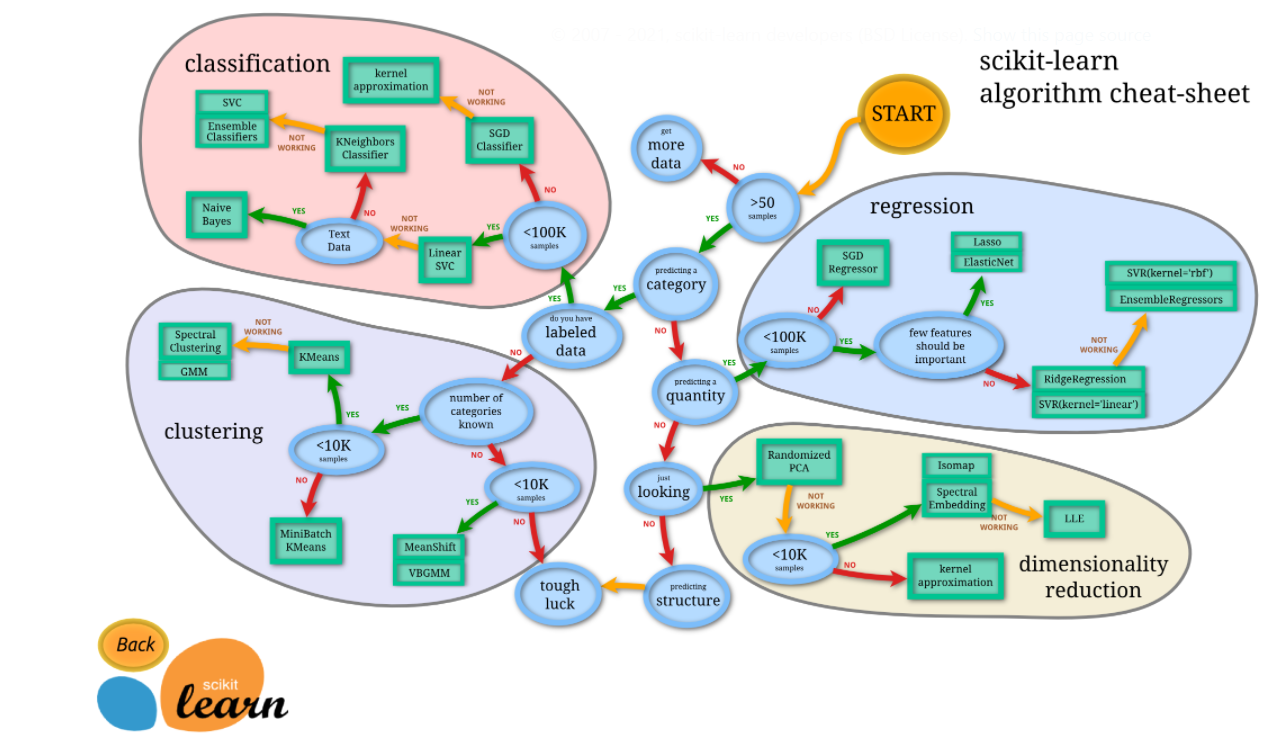

"Wait, I don't see Logistic Regression and why not use LinearSVC?"

Good questions.

I was confused too when I didn't see Logistic Regression listed as well because when we read the Scikit-Learn documentation on it, you can see it's a <a href="https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression">model for classification.</a>

And as for LinearSVC, let's pretend we've tried it, and it doesn't work, so we're following other options in the map.

For now, knowing each of these algorithms inside and out is not essential.

Machine learning and data science is an iterative practice. These algorithms are tools in your toolbox.

In the beginning, on your way to becoming a practioner, it's more important to understand your problem (such as, classification versus regression) and then knowing what tools you can use to solve it.

Since our dataset is relatively small, we can experiment to find algorithm performs best.

All of the algorithms in the Scikit-Learn library use the same functions, for training a model, `model.fit(X_train, y_train)` and for scoring a model `model.score(X_test, y_test).score()` returns the ratio of correct predictions (1.0 = 100% correct).

Since the algorithms we've chosen implement the same methods for fitting them to the data as well as evaluating them, let's put them in a dictionary and create a which fits and scores them.


In [55]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(solver='liblinear'), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [56]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.6470588235294118,
 'Logistic Regression': 0.7941176470588235,
 'Random Forest': 0.7941176470588235}

### Model Comparison
Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

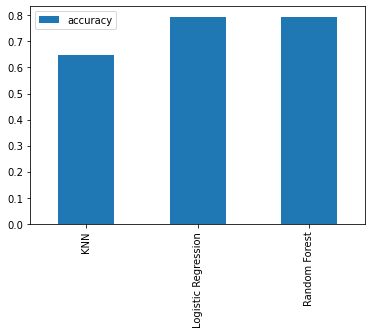

In [57]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()
plt.show()

Beautiful! We can't really see it from the graph but looking at the dictionary, the `LogisticRegression()` and `RandomForestClassifier()` model perform best.<br>

Since you've found the best model. Let's take it to the boss and show her what we've found.

<blockquote>Me: I've found it!</blockquote>

<blockquote>Her: Nice one! What did you find?</blockquote>

<blockquote>Me: The best algorithm for predicting fraud is a LogisticRegrssion/RandomForestClassifier!</blockquote>

<blockquote>Her: Excellent. I'm surprised the hyperparameter tuning is finished by now.</blockquote>

<blockquote>Me: wonders what hyperparameter tuning is</blockquote>

<blockquote>Me: Ummm yeah, me too, it went pretty quick.</blockquote>

<blockquote>Her: I'm very proud, how about you put together a classification report to show the team, and be sure to include a confusion matrix, and the cross-validated precision, recall and F1 scores. I'd also be curious to see what features are most important. Oh and don't forget to include a ROC curve.</blockquote>

<blockquote>Me: asks self, "what are those???"</blockquote>

<blockquote>Me: Of course! I'll have to you by tomorrow.</blockquote>

Alright, there were a few words in there which could sound made up to someone who's not a budding data scientist like yourself. But being the budding data scientist you are, you know data scientists make up words all the time.

Let's briefly go through each before we see them in action.

- __Hyperparameter tuning__ - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
- __Feature importance__ - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
- __<a href="https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/">Confusion matrix</a>__ - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
- __<a href="https://scikit-learn.org/stable/modules/cross_validation.html">Cross-validation</a>__ - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
- __<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score">Precision</a>__ - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
- __<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score">Recall</a>__ - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
- __<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score">F1 score</a>__ - Combines precision and recall into one metric. 1 is best, 0 is worst.
- __<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html">Classification report</a>__ - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
- __<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html">ROC Curve</a>__ - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
- __<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html">Area Under Curve (AUC)</a>__ - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

### Hyperparameter tuning and cross-validation
To cook your favourite dish, you know to set the oven to 180 degrees and turn the grill on. But when your roommate cooks their favourite dish, they set use 200 degrees and the fan-forced mode. Same oven, different settings, different outcomes.

The same can be done for machine learning algorithms. You can use the same algorithms but change the settings (hyperparameters) and get different results.

But just like turning the oven up too high can burn your food, the same can happen for machine learning algorithms. You change the settings and it works so well, it overfits (does too well) the data.

We're looking for the goldilocks model. One which does well on our dataset but also does well on unseen examples.

To test different hyperparameters, you could use a validation set but since we don't have much data, we'll use cross-validation.

The most common type of cross-validation is k-fold. It involves splitting your data into k-fold's and then testing a model on each. For example, let's say we had 5 folds (k = 5). This what it might look like.

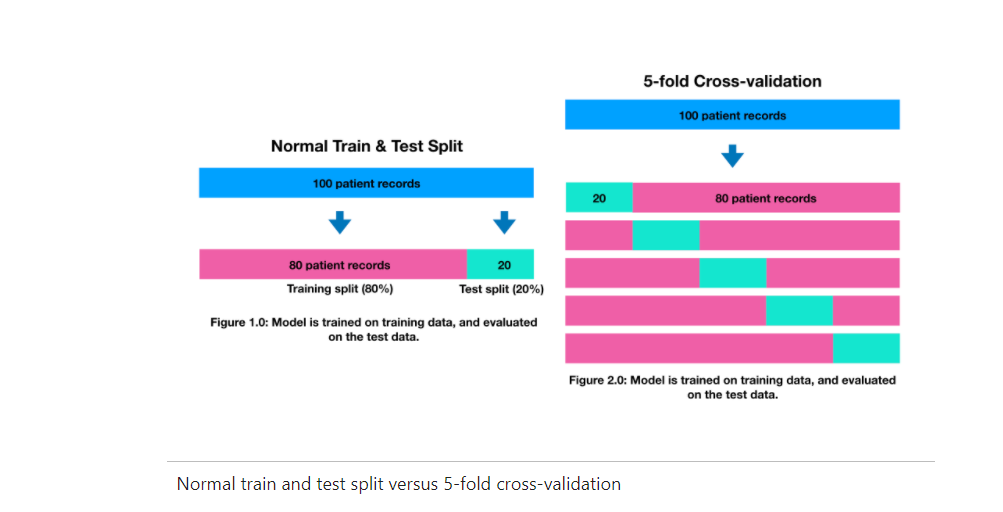

We'll be using this setup to tune the hyperparameters of some of our models and then evaluate them. We'll also get a few more metrics like precision, recall, F1-score and ROC at the same time.

Here's the game plan:

1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

### Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand
There's one main hyperparameter we can tune for the K-Nearest Neighbors (KNN) algorithm, and that is number of neighbours. The default is 5 `(n_neigbors=5)`.

What are neighbours?

Imagine all our different samples on one graph like the scatter graph we have above. KNN works by assuming dots which are closer together belong to the same class. If `n_neighbors=5` then it assume a dot with the 5 closest dots around it are in the same class.

We've left out some details here like what defines close or how distance is calculated but I encourage you to research them.

For now, let's try a few different values of `n_neighbors`.

In [58]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [59]:
train_scores

[1.0,
 0.835820895522388,
 0.835820895522388,
 0.7611940298507462,
 0.7835820895522388,
 0.7686567164179104,
 0.7761194029850746,
 0.7686567164179104,
 0.7761194029850746,
 0.7686567164179104,
 0.7686567164179104,
 0.7686567164179104,
 0.7686567164179104,
 0.7686567164179104,
 0.7686567164179104,
 0.746268656716418,
 0.746268656716418,
 0.746268656716418,
 0.746268656716418,
 0.7388059701492538]

These are hard to understand, let's plot them.

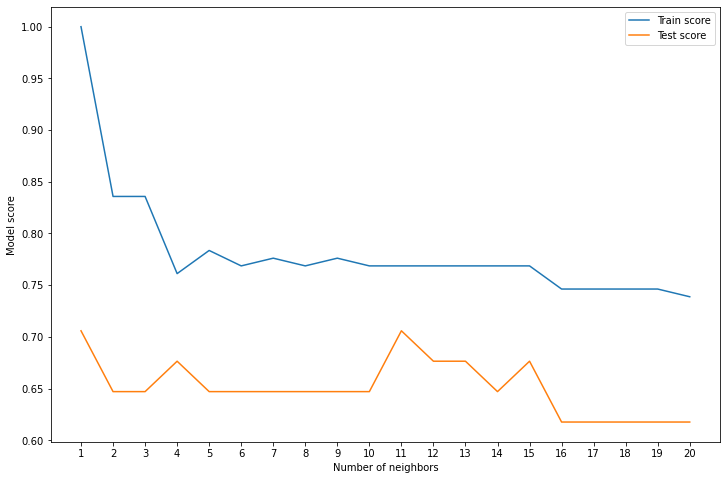

Maximum KNN score on the test data: 70.59%


In [60]:
plt.figure(figsize=(12, 8))
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.show()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, `n_neighbors` = 11 seems best.

Even knowing this, the `KNN`'s model performance didn't get near what LogisticRegression or the RandomForestClassifier did.

Because of this, we'll discard `KNN` and focus on the other two.

We've tuned KNN by hand but let's see how we can `LogisticsRegression` and `RandomForestClassifier` using `RandomizedSearchCV`.

Instead of us having to manually try different hyperparameters by hand, `RandomizedSearchCV` tries a number of different combinations, evaluates them and saves the best.

### Tuning models with with `RandomizedSearchCV`
Reading the Scikit-Learn documentation for `LogisticRegression`, we find there's a number of different hyperparameters we can tune.

The same for `RandomForestClassifier`.

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [61]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(50, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

#### `LogisticRegression`

Now let's use `RandomizedSearchCV` to try and tune our `LogisticRegression model`.

We'll pass it the different hyperparameters from `log_reg_grid` as well as set `n_iter = 20`. This means, `RandomizedSearchCV` will try 20 different combinations of hyperparameters from `log_reg_grid` and save the best ones.

In [62]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [63]:
# Find the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [64]:
rs_log_reg.score(X_test, y_test)

0.8529411764705882

#### `RandomForestClassifier`
Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`

In [65]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950])},
                   verbose=True)

In [66]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [67]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.7647058823529411

Excellent! Tuning the hyperparameters for each model saw a slight performance boost in `LogisticRegression`.

This is akin to tuning the settings on your oven and getting it to cook your favourite dish just right.

But since `LogisticRegression` is pulling out in front, we'll try tuning it further with `GridSearchCV`.

### Tuning a model with `GridSearchCV`
The difference between `RandomizedSearchCV` and `GridSearchCV` is where `RandomizedSearchCV` searches over a grid of hyperparameters performing `n_iter` combinations, `GridSearchCV` will test every single possible combination.

In short:

- __RandomizedSearchCV__ - tries n_iter combinations of hyperparameters and saves the best.
- __GridSearchCV__ - tries every single combination of hyperparameters and saves the best.<br>

Let's see it in action.

In [68]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [69]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [70]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8529411764705882

In this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations.

__Note__: If there are a large amount of hyperparameters combinations in our grid, `GridSearchCV` may take a long time to try them all out. This is why it's a good idea to start with `RandomizedSearchCV`, try a certain amount of combinations and then use `GridSearchCV` to refine them.

### Evaluating a classification model, beyond accuracy
All the evaluating steps above including tune the hyperparamaters is all about accuracy.
Now we've got a tuned model, let's get some of the metrics we discussed before, beyond the accuracy evaluation.

We want:

- ROC curve and AUC score - `plot_roc_curve()`
- Confusion matrix - `confusion_matrix()`
- Classification report - `classification_report()`
- Precision - `precision_score()`
- Recall - `recall_score()`
- F1-score - `f1_score()`

Luckily, Scikit-Learn has these all built-in.

To access them, we'll have to use our model to make predictions on the test set. We can make predictions by calling `predict()` on a trained model and passing it the data you'd like to predict on.

We'll make predictions on the test data.

In [71]:
# Make preidctions on test data
# we use gs_log_reg, because it has highest accuracy so far
y_preds = gs_log_reg.predict(X_test)

In [72]:
y_preds

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

They look like our original test data labels, except different where the model has predicred wrong.

In [73]:
y_test

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0])

### ROC Curve and AUC Scores
What's a _ROC curve_?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

In our case...

To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

Scikit-Learn implements a function `plot_roc_curve` which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

Reading the documentation on the `plot_roc_curve` function we can see it takes `(estimator, X, y)` in our case is `gs_log_reg` as inputs. Where estiamator is a fitted machine learning model and X and y are the data you'd like to test it on.

In our case, we'll use the `GridSearchCV` version of our `LogisticRegression` estimator, `gs_log_reg` as well as the test data, `X_test` and `y_test`

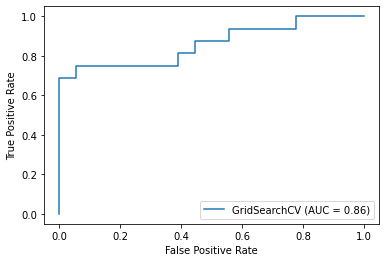

In [74]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

This is great, our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, `AUC = 0.5`. But a perfect model would achieve an AUC score of `1.0`, so there's still room for improvement.

Let's move onto the next evaluation request, a confusion matrix.

### Confusion matrix
A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using `confusion_matrix()` and passing it the true labels and predicted labels.

In [75]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[18  0]
 [ 5 11]]


As you can see, Scikit-Learn's built-in confusion matrix is a bit bland. For a presentation you'd probably want to make it visual.

Let's create a function which uses Seaborn's `heatmap()` for doing so.

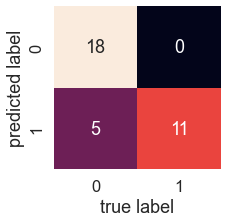

In [76]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

Beautiful! That looks much better.

We can see the model gets confused (predicts the wrong label) relatively the same across both classes. In essence, there are 0 occasaion where the model predicted `0` when it should've been 1 `(false negative)` and `5` occasions where the model predicted 1 instead of 0 `(false positive)`.

### Classification report
We can make a classification report using `classification_report()` and passing it the true labels as well as our models predicted labels.

A classification report will also give us information of the precision and recall of our model for each class.

In [77]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       1.00      0.69      0.81        16

    accuracy                           0.85        34
   macro avg       0.89      0.84      0.85        34
weighted avg       0.88      0.85      0.85        34



What's going on here?

Let's get a refresh.

- __Precision__ - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0. _(look we have it!)_
- __Recall__ - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0. _(we have it as well!)_
- __F1 score__ - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
- __Support__ - The number of samples each metric was calculated on.
- __Accuracy__ - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
- __Macro avg__ - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
- __Weighted avg__ - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

Ok, now we've got a few deeper insights on our model. But these were all calculated using a single training and test set.

What we'll do to make them more solid is calculate them using cross-validation.

How?

We'll take the best model along with the best hyperparameters and use `cross_val_score()` along with various scoring parameter values.

`cross_val_score()` works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using `cross-validatio`n and a defined scoring parameter.

Let's remind ourselves of the best hyperparameters and then see them in action.

In [78]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [80]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.088586679041008232,
                         solver="liblinear")

Now we've got an instantiated classifier, let's find some cross-validated metrics.

In [89]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.73529412, 0.88235294, 0.67647059, 0.78787879, 0.6969697 ])

In [90]:
# Since there are 5 metrics here, we'll take the average.
cv_acc = np.mean(cv_acc)
cv_acc

0.7557932263814617

In [91]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.7878571428571429

In [92]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.4756410256410256

In [93]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.5872580428052229

<AxesSubplot:title={'center':'Cross-Validated Metrics'}>

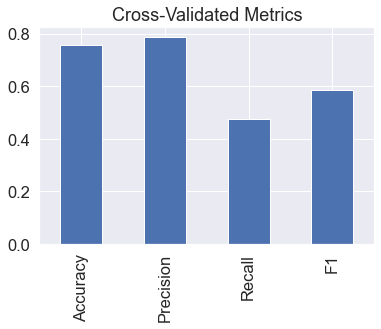

In [94]:
# Okay, we've got cross validated metrics, now what?
# Let's visualize them.
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False)

Great! This looks like something we could share. An extension might be adding the metrics on top of each bar so someone can quickly tell what they were.

What now?

The final thing to check off the list of our model evaluation techniques is feature importance.

### Feature Selection
Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Or for our problem, trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not?

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

You can usually find an example via the Scikit-Learn documentation or via searching for something like "[MODEL TYPE] feature importance", such as, "random forest feature importance".

Since we're using `LogisticRegression`, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the `coef_` attribute. Looking at the `Scikit-Learn` documentation for `LogisticRegression`, the `coef_` attribute is the coefficient of the features in the decision function.

We can access the `coef_` attribute after we've fit an instance of `LogisticRegression`

In [95]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train)

LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [96]:
# Check coef_
clf.coef_

array([[-0.13664624,  0.00561621, -0.00270923, -0.23423118, -0.01643929,
         0.43361328, -0.03771191, -0.22123755,  0.01512123, -0.06081378,
        -0.01607711, -0.00608691, -0.13611239, -0.15211197,  0.01424292,
         0.14930903, -0.15039327, -0.09734603, -0.20155833,  0.02538175,
         0.09078752, -0.1171944 ,  0.21979259, -0.01952998, -0.08609242,
        -0.11346779]])

Looking at this it might not make much sense. But these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.

Even knowing this, in it's current form, this `coef_` array still doesn't mean much. But it will if we combine it with the columns (features) of our dataframe.

In [97]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'digit_customerPhone': -0.1366462379723577,
 'digit_customerDevice': 0.0056162050868153335,
 'digit_customerIPAddress': -0.0027092338951441044,
 'No_Transactions': -0.23423118230989465,
 'No_Orders': -0.016439293573568367,
 'No_Payments': 0.43361327694629725,
 'paymentMethodRegistrationFailure': -0.03771191211231245,
 'transactionFailed': -0.221237552656246,
 'transactionAmount': 0.015121228245485695,
 'apple_pay': -0.060813783205186184,
 'bitcoin': -0.016077114521253294,
 'card': -0.0060869087096468,
 'paypal': -0.13611238914669108,
 'American_Express': -0.15211197274914373,
 'Diners_Club_/_Carte_Blanche': 0.014242924659702897,
 'Discover': 0.14930902627907114,
 'JCB_15_digit': -0.15039327105766864,
 'JCB_16_digit': -0.0973460337588238,
 'Maestro': -0.20155832676525787,
 'Mastercard': 0.0253817476119424,
 'VISA_13_digit': 0.09078752267813159,
 'VISA_16_digit': -0.11719440143757492,
 'Voyager': 0.21979258895684478,
 'failed': -0.019529984533383903,
 'fulfilled': -0.08609242270849966,


Now we've match the feature coefficients to different features, let's visualize them.

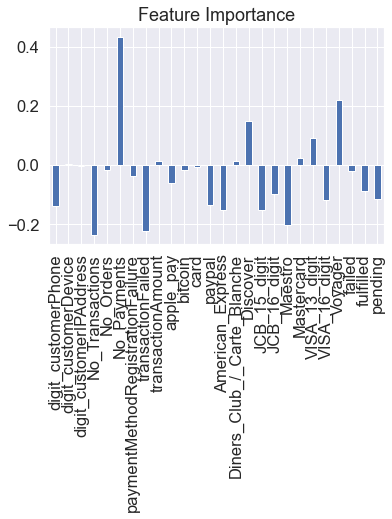

In [100]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False)
plt.show()

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the `No_Transactions` attribute has a negative value of -0.23, which means as the value for `No_Transactions` increases, the `target` value decreases.

We can see this by comparing the `No_Transactions` column to the target column.

In [101]:
pd.crosstab(df["No_Transactions"], df["Target"])

Target,0,1
No_Transactions,,
0,20,7
1,11,7
2,12,6
3,9,7
4,12,7
5,22,7
6,12,7
7,5,6
8,3,2


We can see, when `No_Transactions` is 0, there are almost 7 people with fraud (target = 1).

And then as `No_Transactions` increases to 15, 0 of people who are fraudulent.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the customers have no active transactions, they're more likely to be fraudulent.

How about a negative correlation?

In [105]:
pd.crosstab(df["No_Payments"], df["Target"])

Target,0,1
No_Payments,,
0,11,1
1,54,23
2,26,13
3,13,6
4,3,6
5,0,3
6,0,5
7,0,1
13,0,1


This positive correlation means our model is picking up the pattern that as number of payment increases, so does the target value.

Is this true?

When we look at the contrast `(pd.crosstab(df["No_Payments"], df["Target"])` it is. As `No_Payments` goes down, so does target.

What can we do with this information?

This is something we might want to classify the customers who have many number of payments and customers who have no payments or least number. Because more likely a customer which has more payments, they do real transactions, on the other hand,  a customer with no payments is more likely to be fraudulent because they don't want to make real transactions.

### 6. Experimentation
Well we've completed all the metrics our boss requested. we should be able to put together a great report containing a confusion matrix, a handful of cross-valdated metrics such as precision, recall and F1 as well as which features contribute most to the model making a decision.

But after all this you might be wondering where step 6 in the framework is, experimentation.

Well the secret here is, as we might've guessed, the whole thing is experimentation.

From trying different models, to tuning different models to figuring out which hyperparameters were best.

What we've worked through so far has been a series of experiments.

And the truth is, we could keep going. But of course, things can't go on forever.

So by this stage, after trying a few different things, we'd ask ourselves did we meet the evaluation metric?

Remember we defined one in step 3.

If we can reach `90%` accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

In this case, we didn't. The highest accuracy our model achieved was below `90%`. (Highest of `85.23%` using `LogisticRegression`)

What next?
We might be wondering, what happens when the evaluation metric doesn't get hit?

Is everything we've done wasted?

No.

It means we know what doesn't work. In this case, we know the current model we're using (a tuned version of LogisticRegression) along with our specific data set doesn't hit the target we set ourselves.

This is where step 6 comes into its own.

1. A good next step would be to discuss with our team or research on our own different options of going forward. The good question is, _"is 85% enough for our fraud detection system?"_ or _"Do we need to increase it?"_

2. Could we collect more data? _This is the possible way_

3. Could we try a better model? If you're working with structured data, you might want to look into `CatBoost` or `XGBoost`. _We need to try both if collecting more data with existing model doesn't fit our accuracy_.

4. Could we improve the current models (beyond what we've done so far)?
